# Обработка пропусков

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline 
sns.set(style="ticks")


In [55]:
data = pd.read_csv('~/Downloads/winequality-red.csv', sep=";")

In [56]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,NaN,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
data.isnull().sum()

fixed acidity           0
volatile acidity        2
citric acid             3
residual sugar          0
chlorides               0
free sulfur dioxide     1
total sulfur dioxide    0
density                 2
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1599, 12), (1599, 8))

In [13]:
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))


In [29]:
data1 = pd.read_csv('~/Downloads/car.data', sep=",")

In [30]:
data1.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,NaN,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [31]:
cat_cols = []
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка vhigh. Тип данных object. Количество пустых значений 1, 0.06%.
Колонка 2.1. Тип данных object. Количество пустых значений 2, 0.12%.
Колонка small. Тип данных object. Количество пустых значений 4, 0.23%.


In [33]:
cat_temp_data = data[['small']]
cat_temp_data['small'].unique()

array(['small', 'med', 'big', nan], dtype=object)

In [35]:
cat_temp_data[cat_temp_data['small'].isnull()].shape

(4, 1)

In [40]:
imp2 = SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['small'],
       ['small'],
       ['med'],
       ...,
       ['big'],
       ['big'],
       ['big']], dtype=object)

In [43]:
np.unique(data_imp2)

array(['big', 'med', 'small'], dtype=object)

# Кодирование категориальных признаков

In [45]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,small
1,small
2,med
3,med
4,med
...,...
1722,med
1723,med
1724,big
1725,big


In [47]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc_le


array([2, 2, 1, ..., 0, 0, 0])

# Масштабирование данных

In [57]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['quality']])

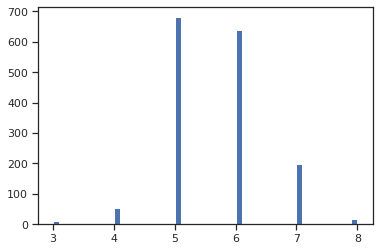

In [58]:
plt.hist(data['quality'], 50)
plt.show()

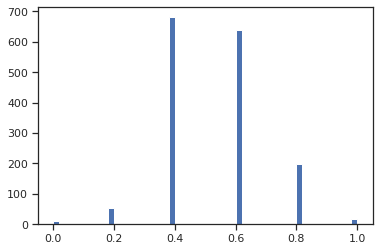

In [61]:
plt.hist(sc1_data, 50)
plt.show()